Deep Learning Models -- A collection of various deep learning architectures, models, and tips for TensorFlow and PyTorch in Jupyter Notebooks.
- Author: Sebastian Raschka
- GitHub Repository: https://github.com/rasbt/deeplearning-models

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch,torchvision

Sebastian Raschka 

CPython 3.7.1
IPython 7.12.0

torch 1.4.0
torchvision 0.5.0


# Custom DataLoader for Fashion-MNIST

The dataset consists of 10 classes similar to the original MNIST dataset. Also, it shares the same overall structure with MNIST, i.e., there are 60k training images and 10k test images, and all images are black & white images of size 28x28. 

Below is an example of how the images look like:

![](figures/fashion-mnist-sprite.png)

(Image Source: https://github.com/zalandoresearch/fashion-mnist)




The 10 classes in this dataset are


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## Step 1: Downloading the essential files

Download all the necessary files listed in this table **and put them into the folder where this Jupyter notebook is located**:
    
    
| Name  | Content | Examples | Size | Link |
| --- | --- |--- | --- |--- |
| `train-images-idx3-ubyte.gz`  | training set images  | 60,000|26 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|
| `train-labels-idx1-ubyte.gz`  | training set labels  |60,000|29 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|
| `t10k-images-idx3-ubyte.gz`  | test set images  | 10,000|4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|
| `t10k-labels-idx1-ubyte.gz`  | test set labels  | 10,000| 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|
    
    

In [3]:
import urllib


files = ('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 
         't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

for file in files:

    filedata = urllib.request.urlopen(f'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/{file}')
    datatowrite = filedata.read()

    with open(file, 'wb') as f:
        f.write(datatowrite)

## Step 2: Unzipping

Next, run this code cell to unzip the .gz files.

In [4]:
# this code cell unzips the .gz files

import sys
import gzip
import shutil
import os

writemode = 'wb'
zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

## Step 3: Loading the files

Next, load the images into NumPy arrays by executing the following function:

In [5]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels


X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

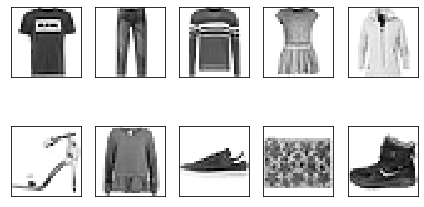

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## Step 4: Saving the images as PNG files

This section will create PNG images from the NumPy arrays.

In [8]:
from PIL import Image

In [9]:
if not os.path.exists('png-files'):
    os.mkdir('png-files')

for idx,row in enumerate(X_train):
    file_name = f"{idx}.png"
    file_path = os.path.join('png-files', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path)    

In [10]:
for idx,row in enumerate(X_test):
    file_name = f"{X_train.shape[0] + idx}.png"
    file_path = os.path.join('png-files', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path)

After executing the previous code, you should have 70k images in the `png-files` directory (60k training images and 10k test images).

In [11]:
len(os.listdir('png-files'))

70000

## Step 5: Creating CSV files with class labels

Lastly, we are going to create CSV files that contain the image file paths with the images' corresponding class labels.

In [12]:
import pandas as pd

In [13]:
df_train = pd.DataFrame(y_train, columns=['class_label'])
df_train['image_name'] = [f"{idx}.png" for idx in range(y_train.shape[0])]
df_train.head()

,class_label,image_name
0,9,0.png
1,0,1.png
2,0,2.png
3,3,3.png
4,0,4.png


In [14]:
df_shuffled = df_train.sample(n=df_train.shape[0], random_state=123)

In [15]:
df_trainset = df_shuffled.iloc[:55000]
df_validset = df_shuffled.iloc[55000:]

In [16]:
df_testset = pd.DataFrame(y_test, columns=['class_label'])
df_testset['image_name'] = [f"{X_train.shape[0]+idx}.png" for idx in range(y_test.shape[0])]
df_testset.head()

,class_label,image_name
0,9,60000.png
1,2,60001.png
2,1,60002.png
3,1,60003.png
4,6,60004.png


In [17]:
df_trainset.to_csv('train.csv', index=None)
df_validset.to_csv('valid.csv', index=None)
df_testset.to_csv('test.csv', index=None)

## Step 6: Creating the custom Dataset and DataLoader classes

In [18]:
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd


class FashionMNISTDataset(Dataset):
    """Custom Dataset for loading FashionMNIST images"""

    def __init__(self, csv_path, img_dir, transform=None):
    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['image_name'].values
        self.y = df['class_label'].values
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir,
                                      self.img_names[index]))
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return self.y.shape[0]

In [19]:
custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [20]:
BATCH_SIZE = 64

In [21]:
train_dataset = FashionMNISTDataset(csv_path='train.csv',
                                    img_dir='png-files/',
                                    transform=custom_train_transform)


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=4)


valid_dataset = FashionMNISTDataset(csv_path='valid.csv',
                                    img_dir='png-files/',
                                    transform=custom_test_transform)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=4)


test_dataset = FashionMNISTDataset(csv_path='test.csv',
                                   img_dir='png-files/',
                                   transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4)

The cell below just checks if the dataset can be loaded correctly.

In [24]:
import torch


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

num_epochs = 2
for epoch in range(num_epochs):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        print('break minibatch for-loop')
        break

Epoch: 1 | Batch index: 0 | Batch size: 64
break minibatch for-loop
Epoch: 2 | Batch index: 0 | Batch size: 64
break minibatch for-loop


Visualize some iamges:

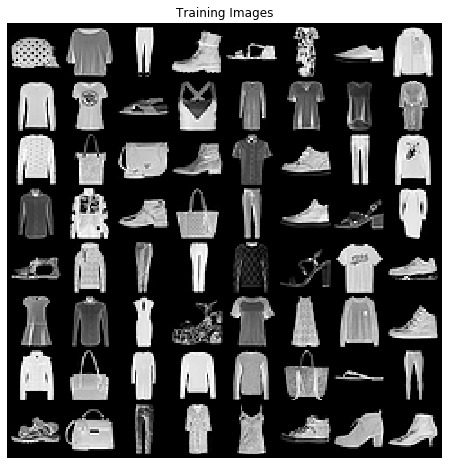

In [27]:
import torchvision.utils as vutils

batch = next(iter(train_loader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(batch[0][:64], 
                                         padding=2, normalize=True),
                        (1, 2, 0)))
plt.show()